In [ ]:
from tensorflow import keras 
import tensorflow as tf

from keras import models
from keras import layers


In [ ]:
data = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = data
 
print(x_train.shape)
print(y_train.shape)
 
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
# setting class names
class_names=[ "airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [ ]:
(y_train)

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

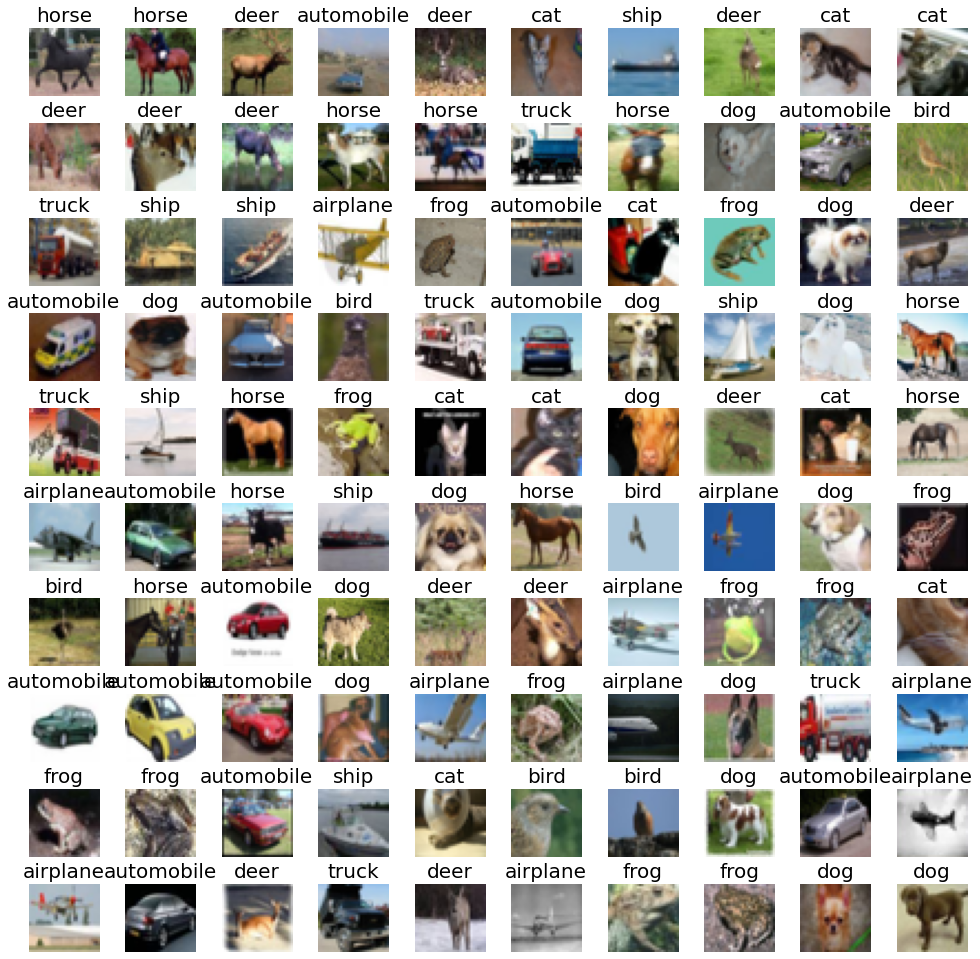

In [ ]:

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
fig, axes = plt.subplots(10, 10, figsize = (17,17))

axes = axes.ravel() 

n_train = len(x_train) 

for i in np.arange(0, 10 * 10):
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(class_names[label_index], fontsize = 20)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

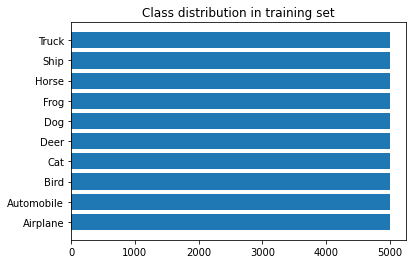

In [ ]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in test set')

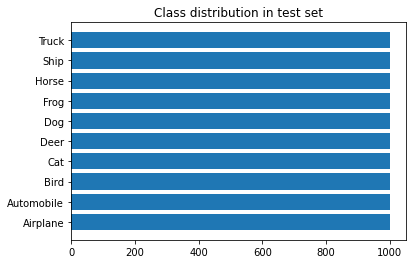

In [ ]:

classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in test set')

In [ ]:
#Normalize Data
X_train = X_train.reshape((50000 , 32 * 32 * 3))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((10000 , 32 * 32 *3 ))
X_test = X_test.astype('float32') / 255


train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [ ]:
#Model Building
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', name='Layer_1', input_shape=(32 * 32 * 3,)))
model.add(layers.Dense(256, activation='relu', name='Layer_2'))
model.add(layers.Dense(128, activation='relu', name='Layer_3'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               1573376   
                                                                 
 Layer_2 (Dense)             (None, 256)               131328    
                                                                 
 Layer_3 (Dense)             (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = tf.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, train_labels, epochs=50, batch_size=20)

Epoch 1/50
2500/2500 [==============================] - 31s 12ms/step - loss: 1.8215 - accuracy: 0.3459
Epoch 2/50
2500/2500 [==============================] - 31s 12ms/step - loss: 1.6312 - accuracy: 0.4190
Epoch 3/50
2500/2500 [==============================] - 29s 12ms/step - loss: 1.5496 - accuracy: 0.4471
Epoch 4/50
2500/2500 [==============================] - 29s 12ms/step - loss: 1.4939 - accuracy: 0.4659
Epoch 5/50
2500/2500 [==============================] - 29s 12ms/step - loss: 1.4491 - accuracy: 0.4811
Epoch 6/50
2500/2500 [==============================] - 29s 12ms/step - loss: 1.4049 - accuracy: 0.4993
Epoch 7/50
2500/2500 [==============================] - 30s 12ms/step - loss: 1.3648 - accuracy: 0.5147
Epoch 8/50
2500/2500 [==============================] - 30s 12ms/step - loss: 1.3327 - accuracy: 0.5263
Epoch 9/50
2500/2500 [==============================] - 31s 12ms/step - loss: 1.2989 - accuracy: 0.5404
Epoch 10/50
2500/2500 [==============================] - 30s 12m

In [ ]:
model.evaluate(X_test,test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 1.8666 - accuracy: 0.5432


[1.8665685653686523, 0.5432000160217285]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(training_history.history['acc'],label='Training Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

In [ ]:
plt.plot(training_history.history['loss'],label='Training Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

In [ ]:
score = network.evaluate(test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])